# 911 Calls Data Analysis

For this project, we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [28]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Data Assessing

Top 5 zipcodes for 911 calls

In [29]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls

In [30]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of unique title codes 

In [31]:
df['title'].nunique()

110

## Creating new features

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [5]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [6]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

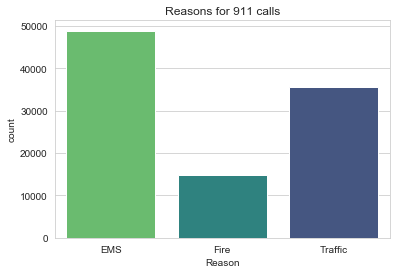

In [28]:
sns.countplot(x='Reason',data=df,palette='viridis_r');
plt.title('Reasons for 911 calls');

Check the data type of the objects in the timeStamp column

In [8]:
type(df['timeStamp'].iloc[0])

str

Convert the column from strings to DateTime objects and grab hour, month, and day of week from the timestamp

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

The Day of Week is an integer 0-6 now. Map the actual string names to the day of the week

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [12]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Plot the Day of Week and Month column with the hue based off of the Reason column

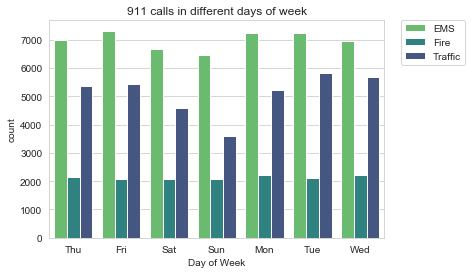

In [29]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.title('911 calls in different days of week');

> Comments: There were more 911 calls on Tuesdays and Wednesdays. EMS related 911 calls are always higher than fire and traffic related 911 calls. 

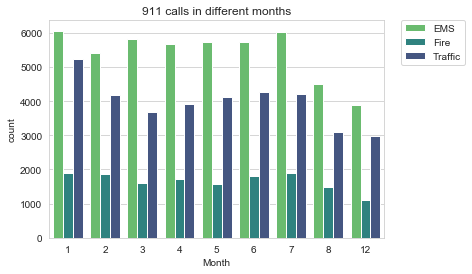

In [30]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.title('911 calls in different months');

> Comments: It is missing some months! 9,10, and 11 are not there.

Now try a simple line plot that fills in the missing months

In [20]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


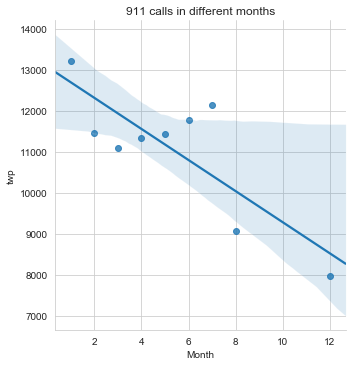

In [26]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index());
plt.title('911 calls in different months');

Create a new column called 'Date' that contains the date from the timeStamp column

In [31]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

create a plot of counts of 911 calls based on dates

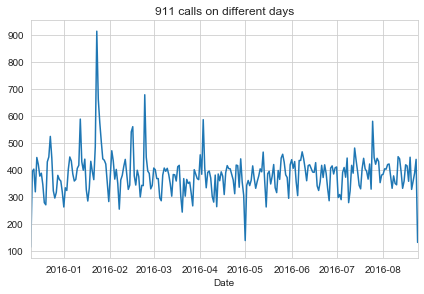

In [32]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout();
plt.title('911 calls on different days');

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

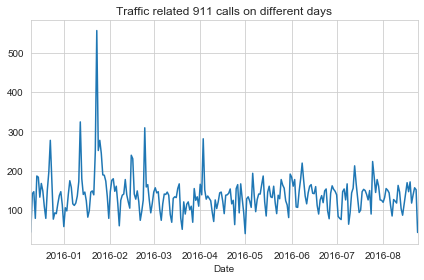

In [33]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.title('Traffic related 911 calls on different days');

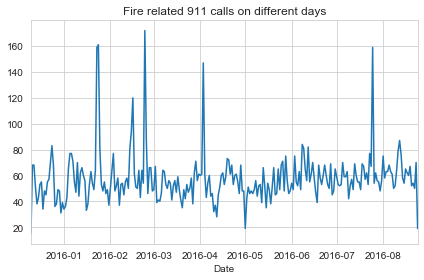

In [34]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.title('Fire related 911 calls on different days');

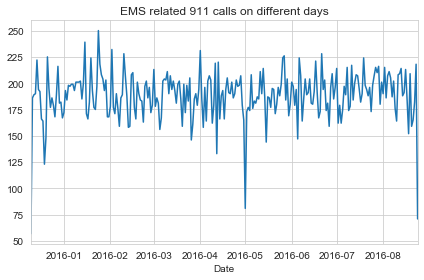

In [35]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.title('EMS related 911 calls on different days');

____
Now create a new dataset dayHour 

In [36]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Now create a HeatMap 

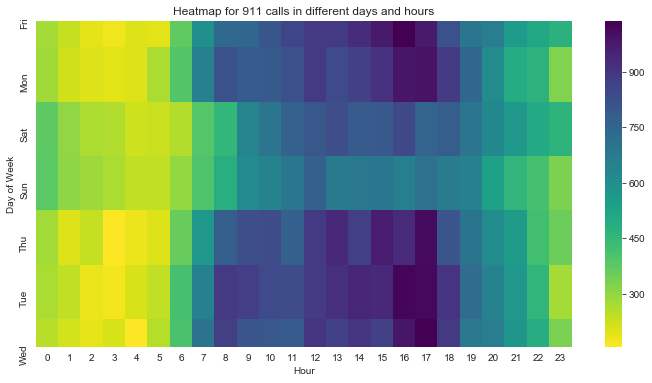

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis_r')
plt.title('Heatmap for 911 calls in different days and hours');

Now create a clustermap

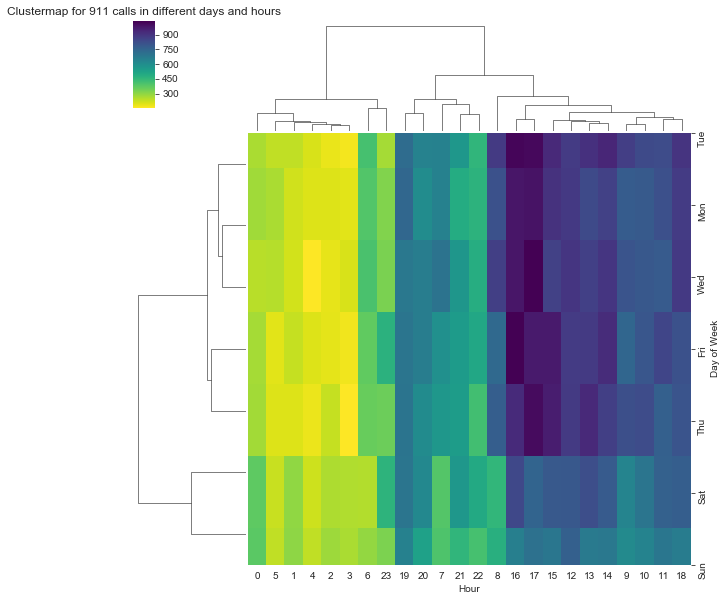

In [40]:
sns.clustermap(dayHour,cmap='viridis_r')
plt.title('Clustermap for 911 calls in different days and hours');

Now do the same for dataset that shows the Month as the column

In [42]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


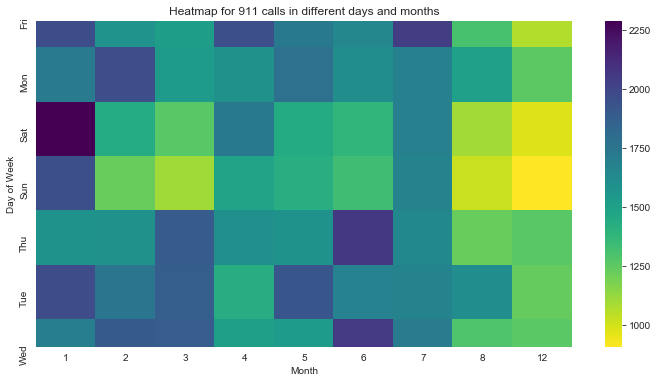

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis_r')
plt.title('Heatmap for 911 calls in different days and months');

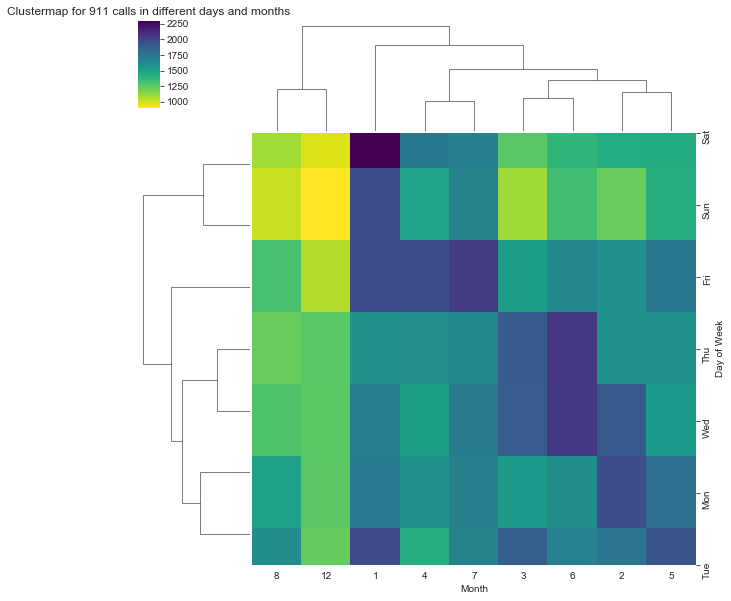

In [45]:
sns.clustermap(dayMonth,cmap='viridis_r')
plt.title('Clustermap for 911 calls in different days and months');